# EECS 545 (WN 2023) Homework 5: PCA and Eigenfaces

<span class="instruction">Before starting the assignment, please fill in the following cell.</span>

In [1]:
###################################################################
# Enter your first and last name, e.g. "John Doe"                 #
# for example                                                     #
# __NAME__ = "Jongwook Choi"                                      #
# __UNIQID__ = "jwook"                                            #
###################################################################
# raise NotImplementedError("TODO: Add your implementation here.")
__NAME__ = "Yuzhou Chen"                                      #
__UNIQID__ = "yzc"   
###################################################################
#                        END OF YOUR CODE                         #
###################################################################

print(f"Your name and email: {__NAME__} <{__UNIQID__}@umich.edu>")
assert __NAME__ and __UNIQID__

Your name and email: Yuzhou Chen <yzc@umich.edu>


# PCA and Eigenfaces

In this notebook, you will test your convolution layer implementation from `layers.py` and then test your CNN implementation from `cnn.py` on the MNIST dataset.

## Setup code
Before getting started, we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook. Let's start by checking whether we are using Python 3.10 or higher.

In [2]:
import sys
if sys.version_info[0] < 3:
    raise Exception("You must use Python 3")

if sys.version_info[1] < 11:
    print("Autograder will execute your code based on Python 3.11 environment. Please use Python 3.11 or higher to prevent any issues")
    print("You can create a conda environment with Python 3.11 like 'conda create --name eecs545 python=3.11'")
    raise Exception("Python 3 version is too low: {}".format(sys.version))
else:
    print("You are good to go")

You are good to go


First, run this cell load the [autoreload](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html) extension. This allows us to edit `.py` source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [3]:
%load_ext autoreload
%autoreload 2

Then, we run some setup code for this notebook: Import some useful packages and increase the default figure size.

In [4]:
# import libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# set figure size
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['font.size'] = 10
%config InlineBackend.figure_format = 'retina'

In [5]:
from IPython.display import display_html, HTML

display_html(HTML('''
<style type="text/css">
  .instruction { background-color: yellow; font-weight:bold; padding: 3px; }
</style>
'''));

In [6]:
import pca
pca.hello_world()   # should print "Hello world from EECS 545 PCA!"

Hello world from EECS 545 PCA!


## Load Data

Let's load the face images data. The dataset contains 2414 face grayscale images with size (48 x 42).

In [7]:
images = np.load("data/face.npy")
images.shape

(2414, 48, 42)

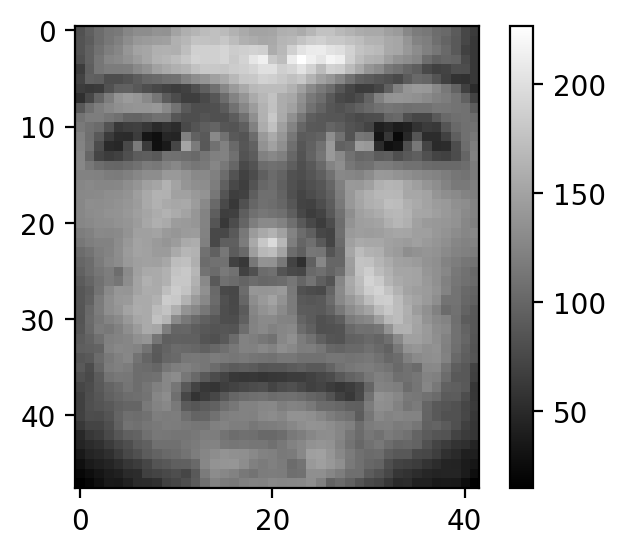

In [8]:
fig, ax = plt.subplots(figsize=(4, 3))
im = ax.imshow(images[0], cmap='gray');
fig.colorbar(im);

## 3(b) PCA

<p class="instruction">Now implement the `pca.train_PCA` function.</p> This function should return the transform matrix $U$ and eigenvalues $\lambda = (\lambda_1, \cdots, \lambda_m)$ such that $u_1$ is the first principal component with eigenvalue $\lambda_1$, and so on. Training PCA on this particular dataset will take some time; for instance, around 10 seconds on a laptop.

In [9]:
# Convert images to a 2D matrix
X = images.reshape([images.shape[0], -1])

In [10]:
%%time
U, eigenvalues = pca.train_PCA(X)

CPU times: user 17.5 s, sys: 156 ms, total: 17.7 s
Wall time: 2.21 s


## 3(c) Eigenvalues

Add a few notebook cells to answer 3(b), i.e., <span class="instruction"> report the first few eigenvalues and draw a plot of eigenvalues.</span> Please follow the instruction of the problemset. Do not forget using log scale for the y-axis (e.g., `ax.set_yscale('log')`)

In [11]:
print(eigenvalues[:10])

[2719333.89451626 2611865.95964519  365515.29797577  211149.83657024
  110603.22720593  104715.79567702   78512.9353901    67032.06261281
   52592.80467658   49197.08114141]


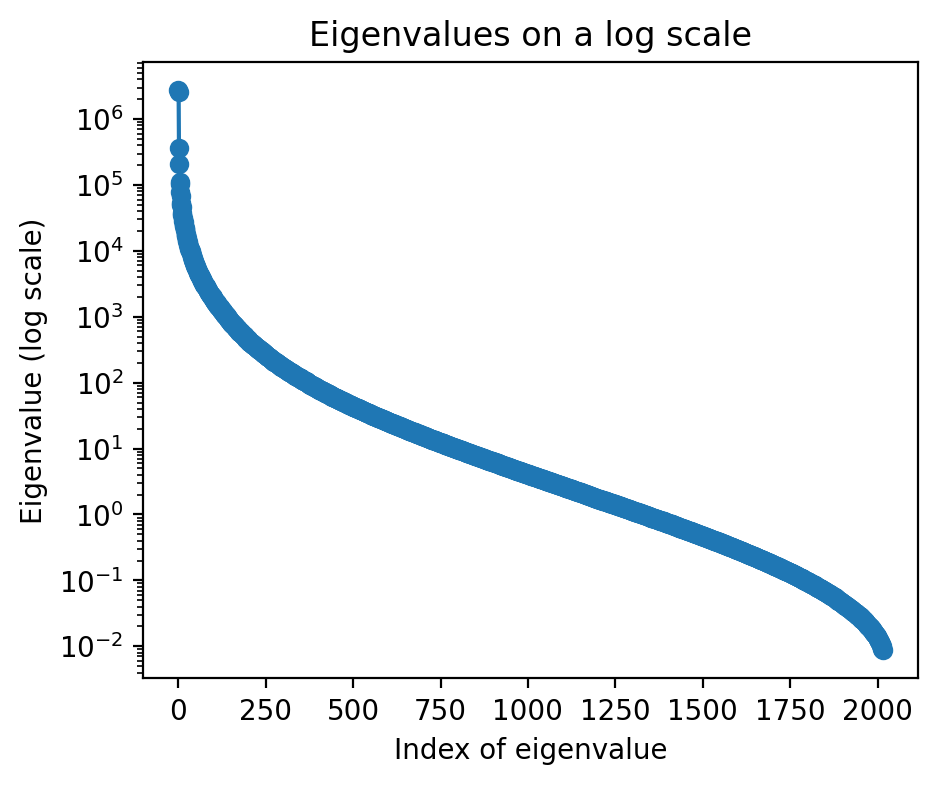

In [16]:
fig, ax = plt.subplots()
ax.plot(eigenvalues, marker='o')  # Mark each eigenvalue with a circle
ax.set_yscale('log')  # Set the y-axis to a log scale
ax.set_title('Eigenvalues on a log scale')
ax.set_xlabel('Index of eigenvalue')
ax.set_ylabel('Eigenvalue (log scale)')

plt.show()

#######################################################################
# raise NotImplementedError("TODO: Add your implementation here.")
#######################################################################

## 3(d) Eigenvectors (Eigenfaces)

Now work on 3(d): You will need to <span class="instruction">make a 2x5 array of plots</span> showing the first 9 eigenvalues as well as the mean of images as the first principal component. Please use `"jet"` color map (see [matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) documentation) to visualize the difference more clearly. Also note that each eigenface may have different colormap scale; optionally, you may also want to add colorbars to visualize the scale of colormaps.

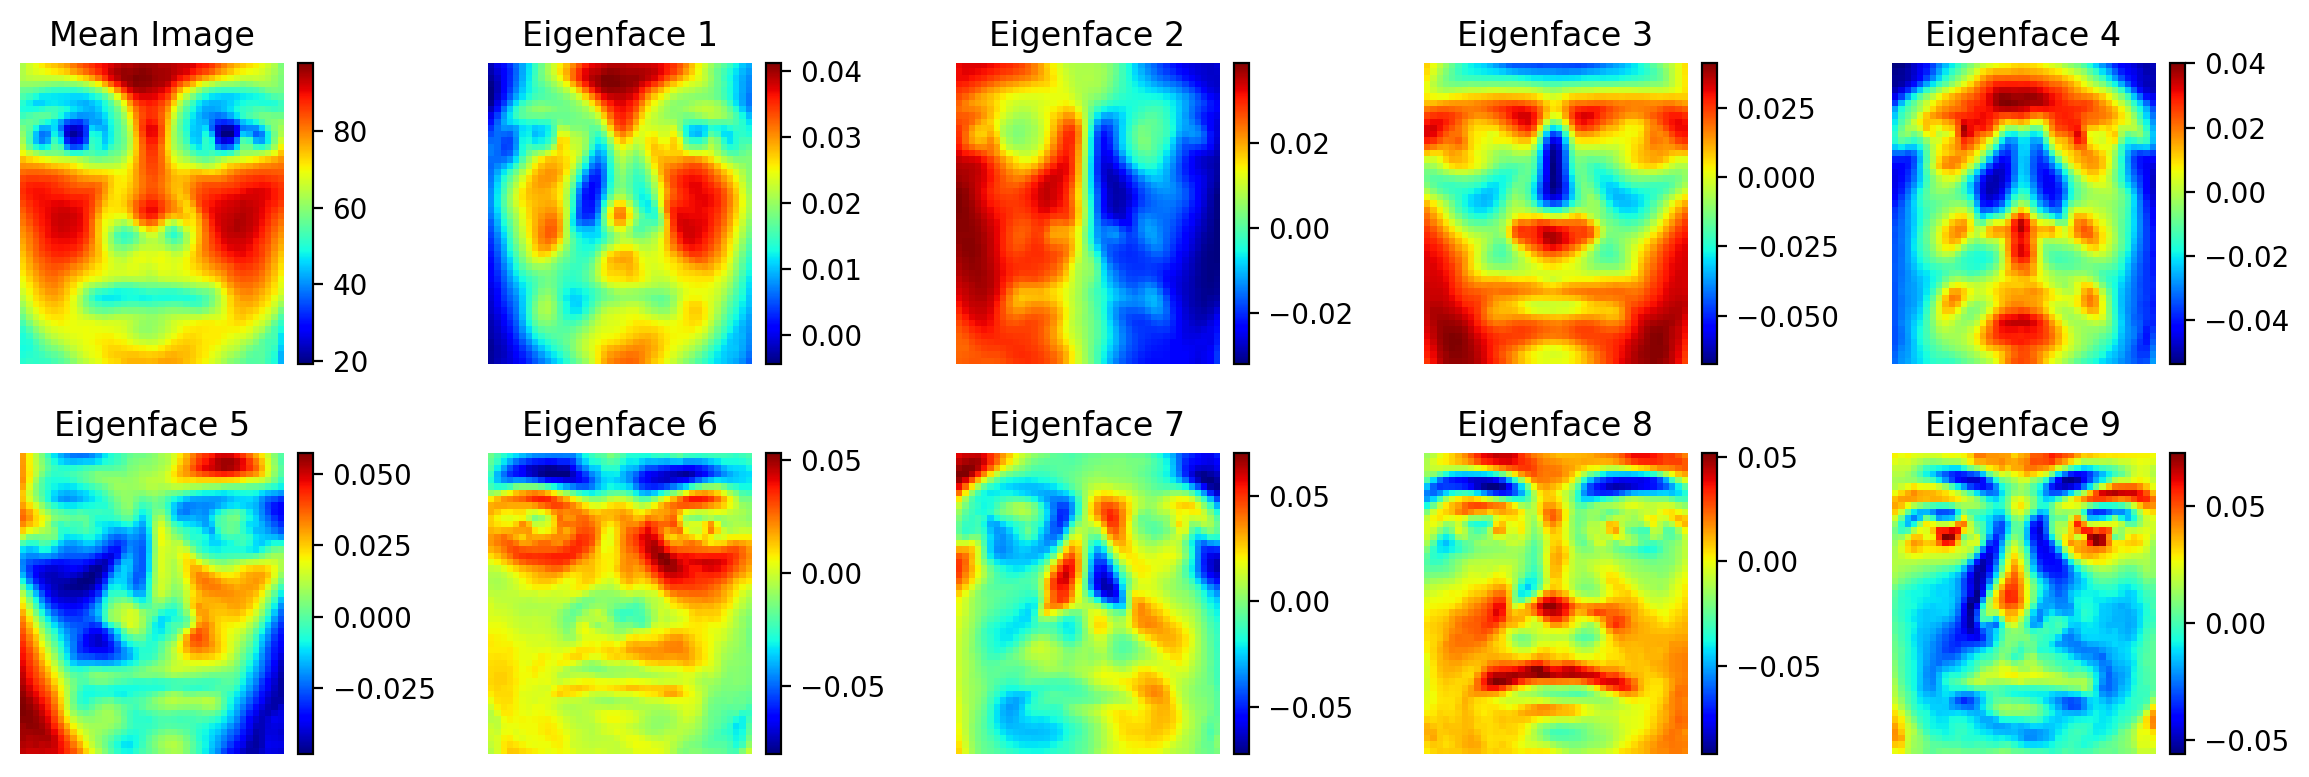

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(12, 4))

#######################################################################
# raise NotImplementedError("TODO: Add your implementation here.")
ax = axes[0, 0]
mean_face = np.mean(images, axis=0)
mean_image_reshaped = mean_face.reshape(images.shape[1:]) 
im = ax.imshow(mean_image_reshaped, cmap='jet')
ax.axis('off')
ax.set_title('Mean Image')
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# Display the eigenfaces
for i in range(9):
    ax = axes.flat[i + 1]
    eigenface_reshaped = U[:, i].reshape(images.shape[1:]) 
    im = ax.imshow(eigenface_reshaped, cmap='jet')
    ax.axis('off')
    ax.set_title(f'Eigenface {i+1}')
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

#######################################################################

fig.tight_layout()
plt.show()

## 3(e) Total Variance

<span class="instruction">Now work on answering 3(e)</span>: feel free to create more cells to do necessary computation.

In [24]:
total_variance = np.sum(eigenvalues)
cumulative_variance = np.cumsum(eigenvalues)

# Find the number of components needed to explain at least 95% of the variance
k_95 = np.argmax(cumulative_variance / total_variance >= 0.95) + 1
k_99 = np.argmax(cumulative_variance / total_variance >= 0.99) + 1

# Calculate the percentage of dimension reduction for 95% and 99% variance
reduction_95 = (1 - k_95 / len(eigenvalues)) * 100
reduction_99 = (1 - k_99 / len(eigenvalues)) * 100

print(f'Number of components to explain 95% variance: {k_95}')
print(f'Dimension reduction at 95% variance: {reduction_95}%')
print(f'Number of components to explain 99% variance: {k_99}')
print(f'Dimension reduction at 99% variance: {reduction_99}%')

(43, 167, 97.8670634920635, 91.71626984126983)